# Abnormal HbA1c Results During COVID-19

This notebook describes deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. The following measures are reported: 
1. Absolute count of abnormal results (by age, sex, region, IMD, and diabetes type)
2. Percentage of abnormal results of total number of tests taken (by age, sex, region, IMD, and diabetes type)
3. Absolute count of abnormal results of tests taken by patients with type 1 diabetes (by age, sex, region, IMD)
4. Percentage of abnormal results of tests taken by patients with type 1 diabetes (by age, sex, region, and IMD)
5. Absolute count of abnormal results of tests taken by patients with type 2 diabetes (by age, sex, region, IMD)
6. Percentage of abnormal results of tests taken by patients with type 2 diabetes (by age, sex, region, and IMD)

In [83]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Import measures
def import_df(f_path):
    df = pd.read_csv("../output/data/{}.csv".format(f_path))
    # Create percent of population
    df['pct'] = df['value']*100
    return df

# Filter data
def filter_df(df, flag):
    return df.loc[df[flag] == 1]

# Create charts
def create_chart(measure, ylabel, title, group, df):
    plt.figure(figsize = (15,8))
    if group=='population':
        ax = sns.lineplot(x = 'date', y = measure, data = df, ci = None)
    else:
        ax = sns.lineplot(x = 'date', y = measure, hue = group, data = df, ci = None)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.setp(labels, rotation=65)
    plt.title(title)
    plt.show()
    print('\n')

In [85]:
# Total tests
df_pop = import_df('measure_hba1c_abnormal')
df_dm = import_df('measure_hba1c_abnormal_by_diabetes_type')
df_sex = import_df('measure_hba1c_abnormal_by_sex')
df_age = import_df('measure_hba1c_abnormal_by_age')
df_region = import_df('measure_hba1c_abnormal_by_region')
df_imd = import_df('measure_hba1c_abnormal_by_imd')

In [86]:
# T1 Diabetes
df_pop_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal'),'diabetes_t1')
df_sex_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_sex'),'diabetes_t1')
df_age_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_age'),'diabetes_t1')
df_region_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_region'),'diabetes_t1')
df_imd_t1 = filter_df(import_df('measure_t1dm_hba1c_abnormal_by_imd'),'diabetes_t1')

In [87]:
# T2 Diabetes
df_pop_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal'),'diabetes_t2')
df_sex_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_sex'),'diabetes_t2')
df_age_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_age'),'diabetes_t2')
df_region_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_region'),'diabetes_t2')
df_imd_t2 = filter_df(import_df('measure_t2dm_hba1c_abnormal_by_imd'),'diabetes_t2')

## Count of Abnormal Results (All Tests)

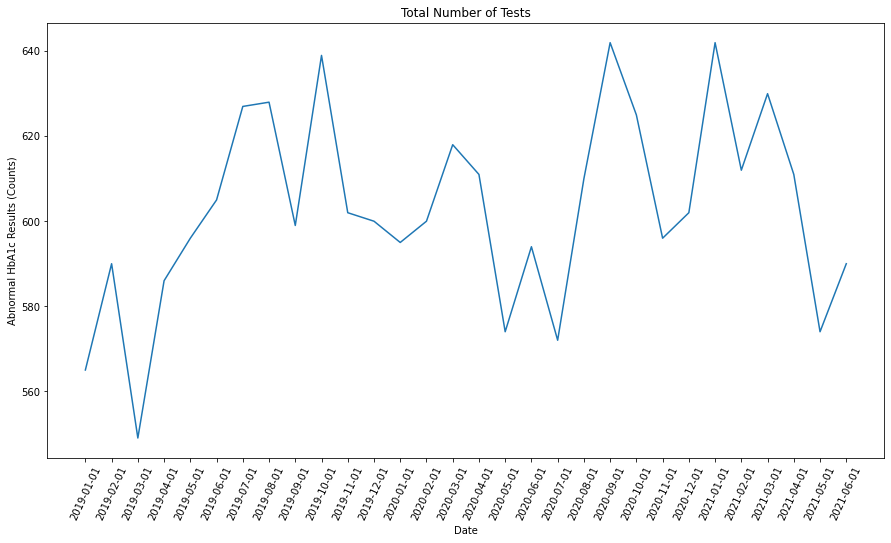

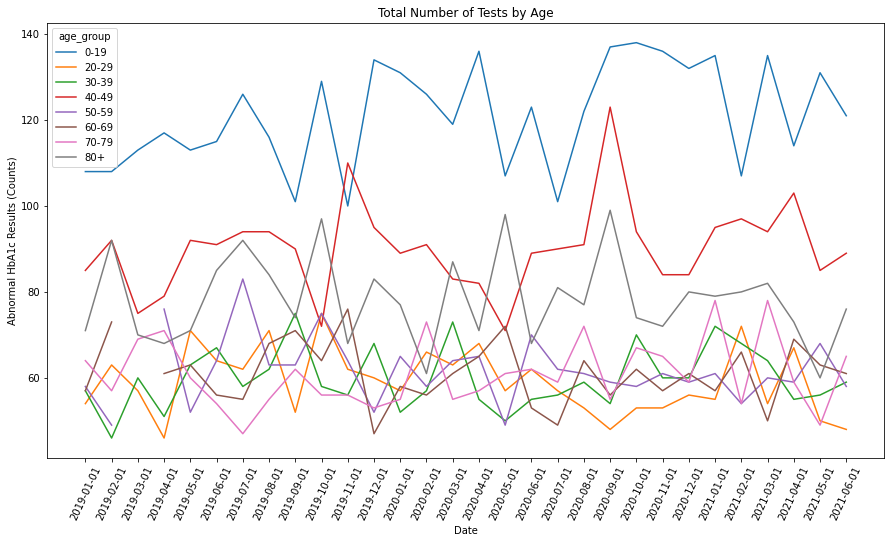

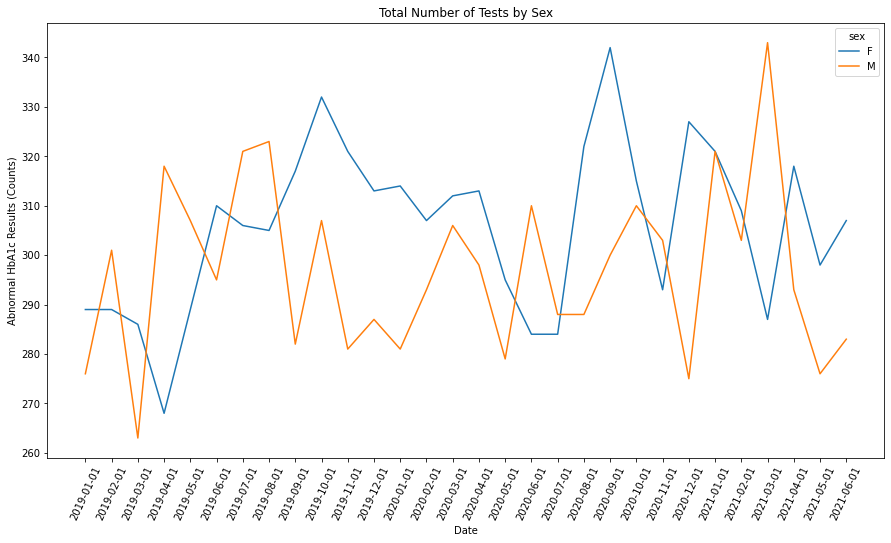

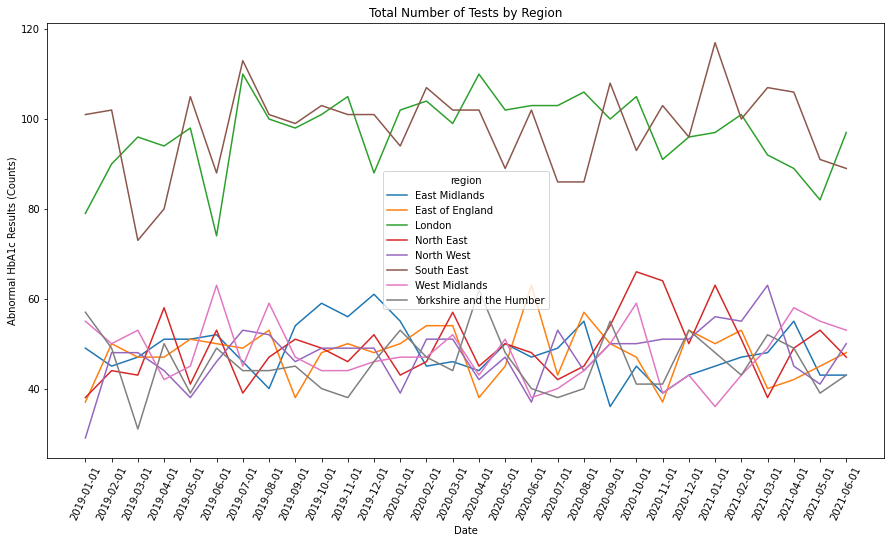

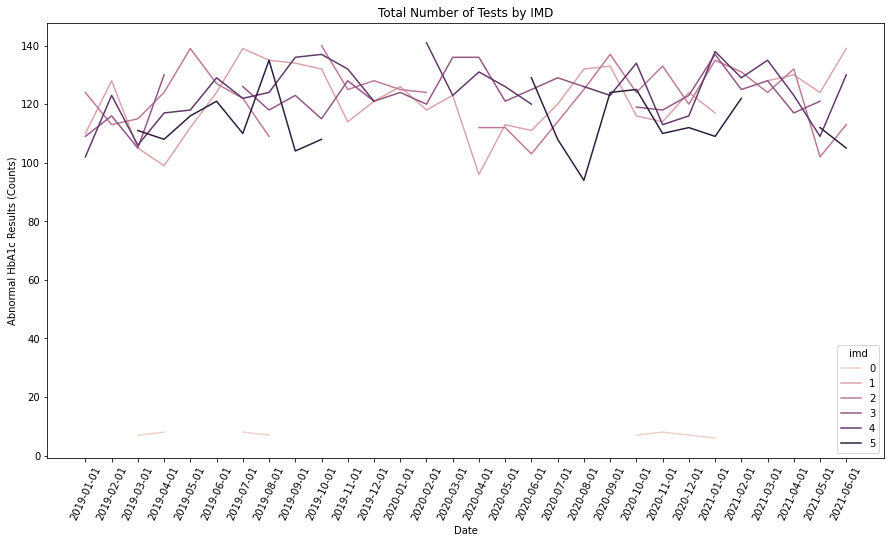

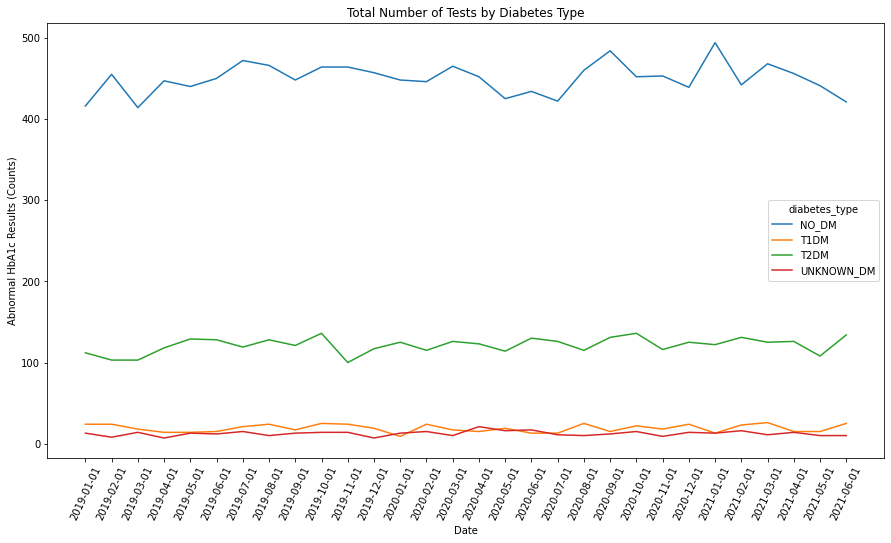

In [88]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests',
             'population', df_pop)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Sex',
             'sex', df_sex)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by Region',
             'region', df_region)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Total Number of Tests by IMD',
             'imd', df_imd)

# Diabetes type
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Total Number of Tests by Diabetes Type',
             'diabetes_type', df_dm)

## Percentage of Abnormal Results of Total Tests

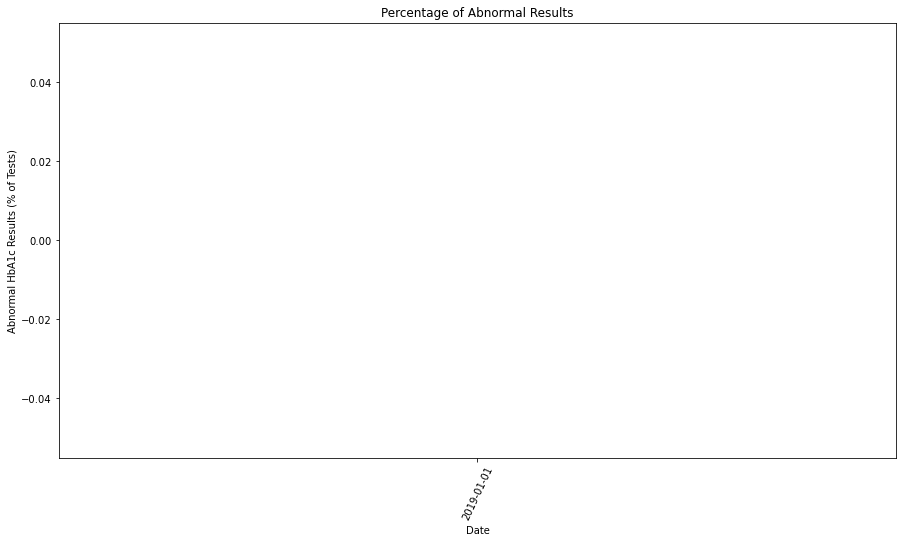

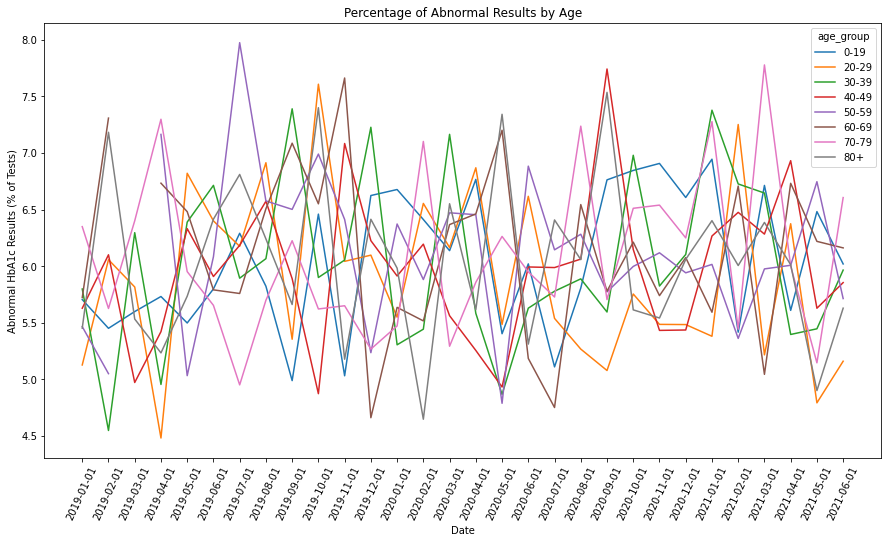

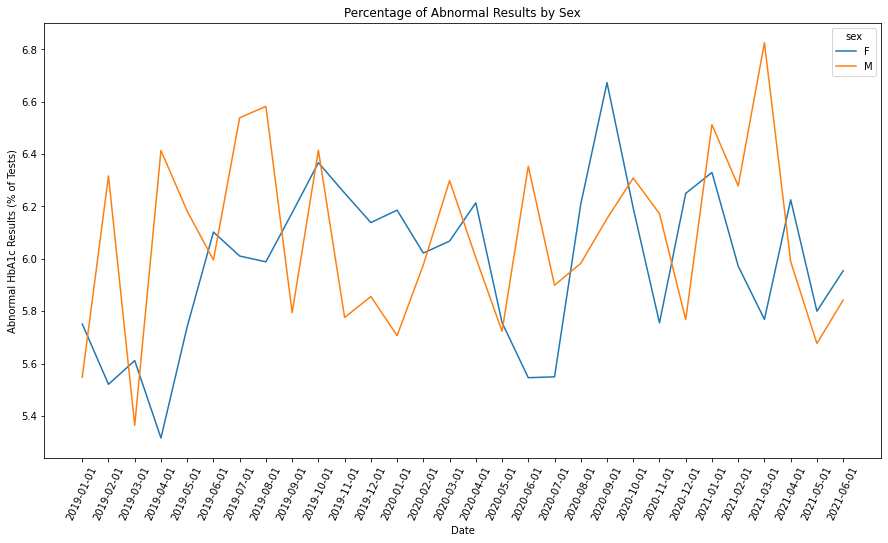

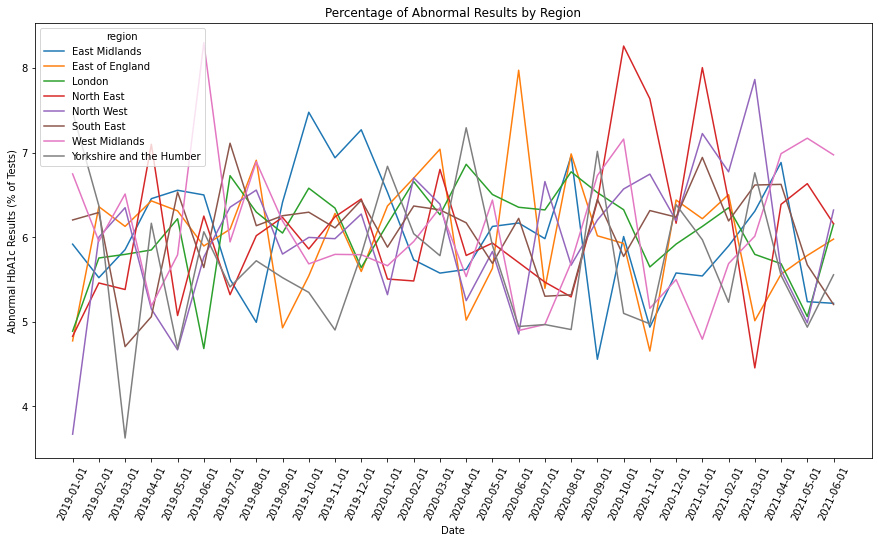

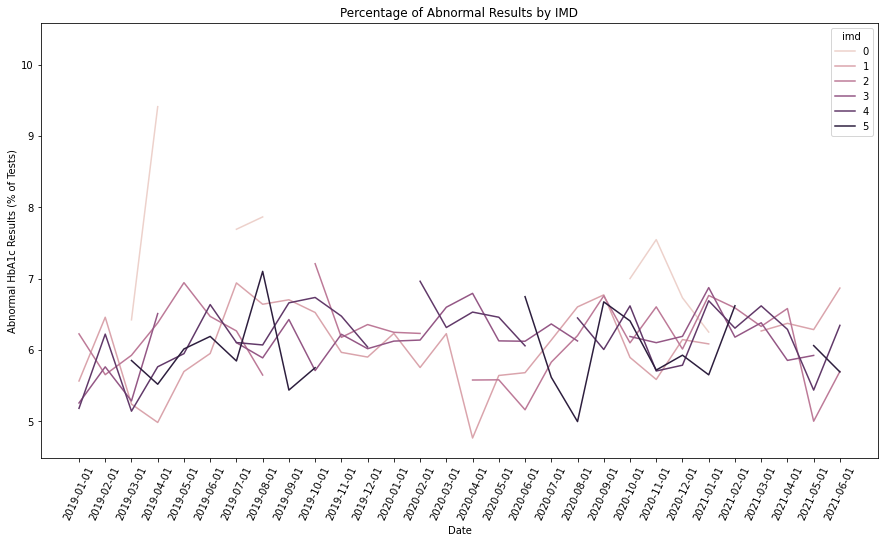

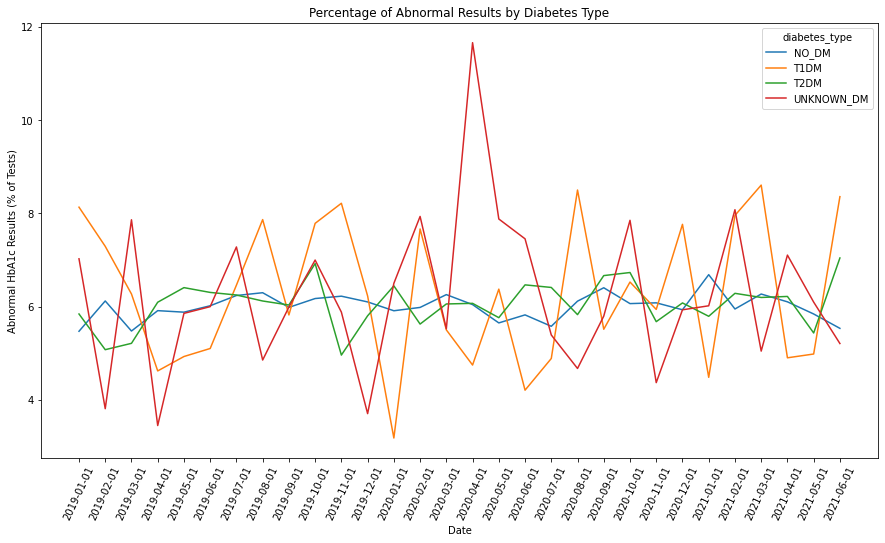

In [89]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results',
             'population', df_pop)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age',
             'age_group', df_age.loc[df_age.age_group != 'missing'])

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex',
             'sex', df_sex)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region',
             'region', df_region)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD',
             'imd', df_imd)

# Diabetes type
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results by Diabetes Type',
             'diabetes_type', df_dm)

## Count of Abnormal Results (Patients with Type 1 Diabetes Only)

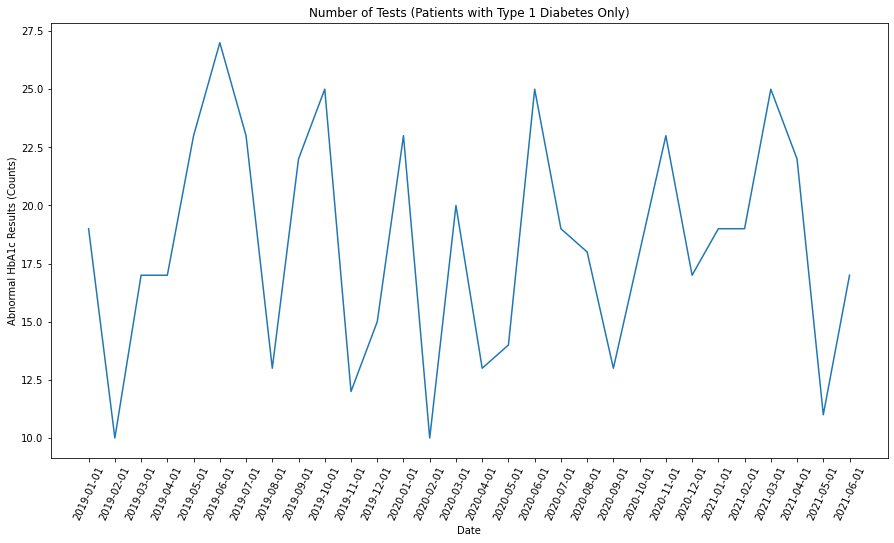

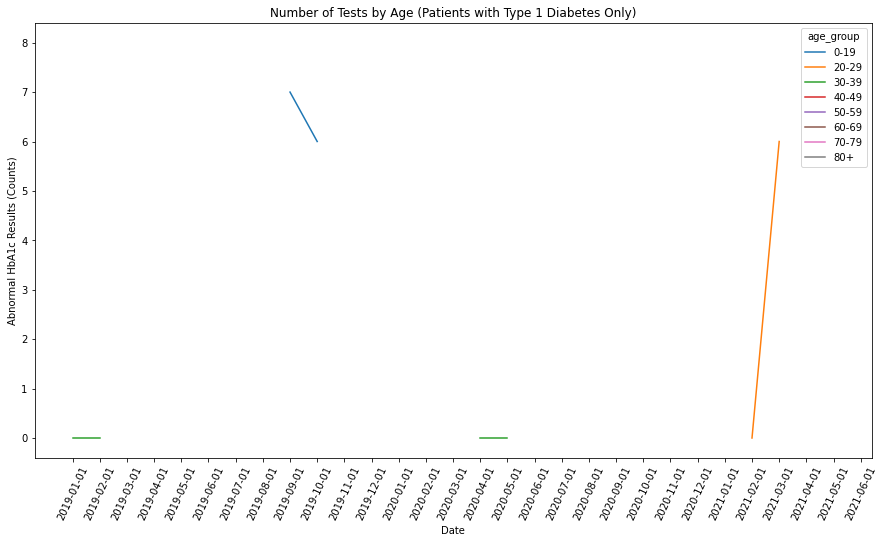

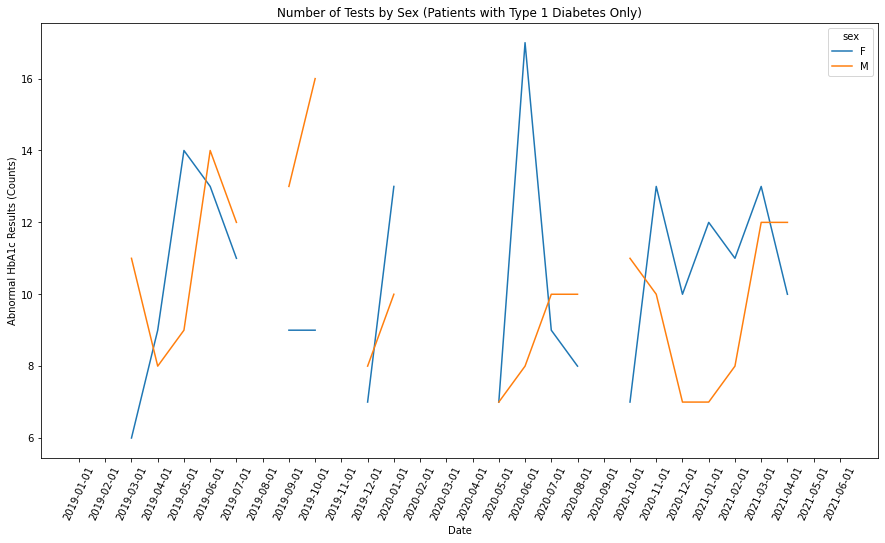

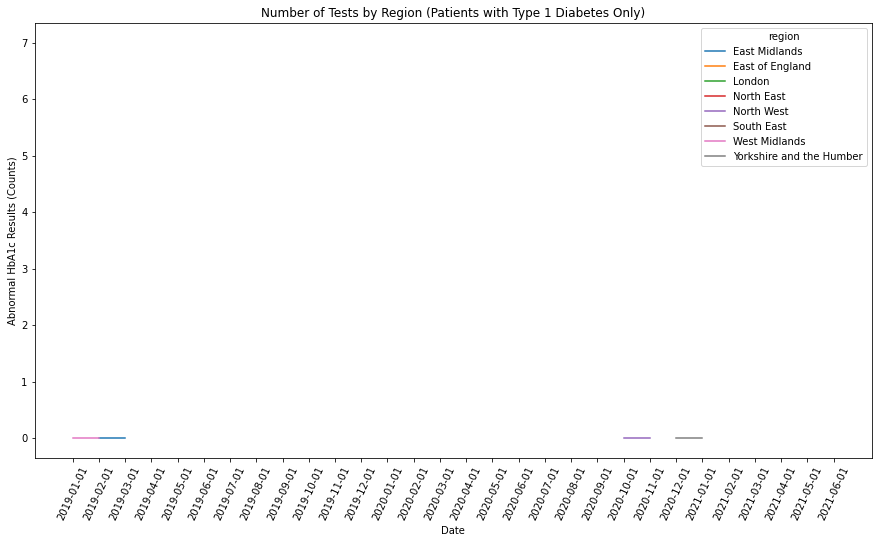

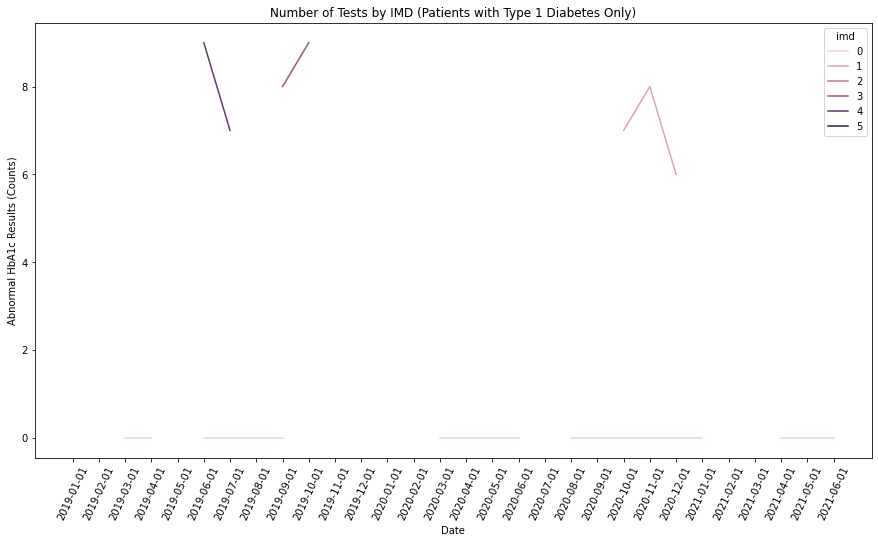

In [77]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'])

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1)

## Percentage of Abnormal Results of Total Tests (Patients with Type 1 Diabetes Only)

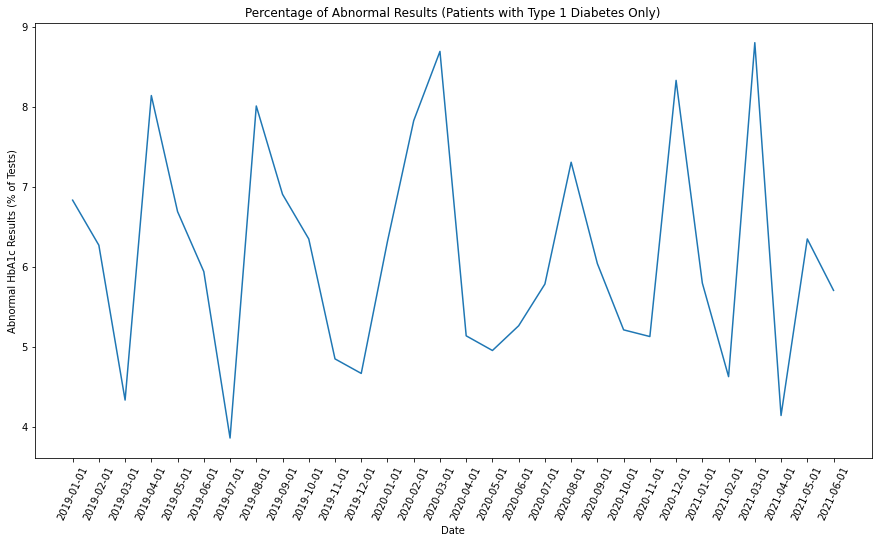

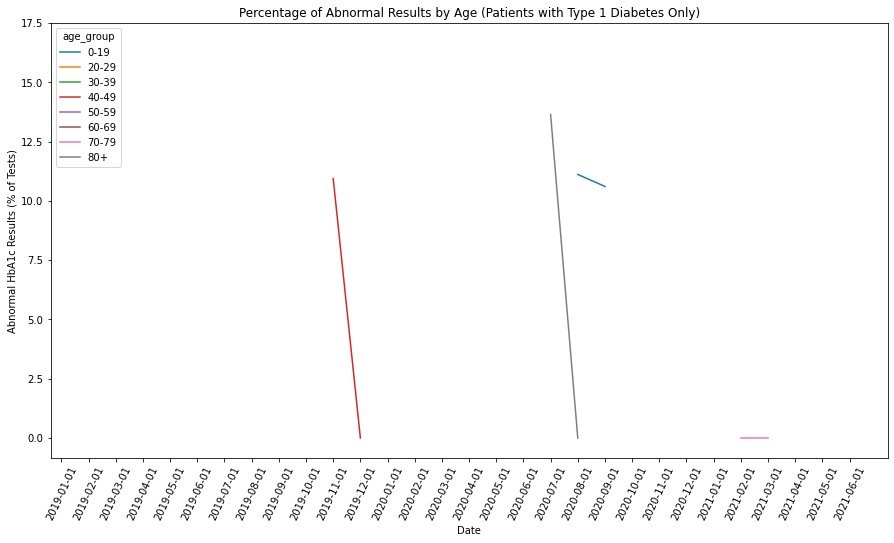

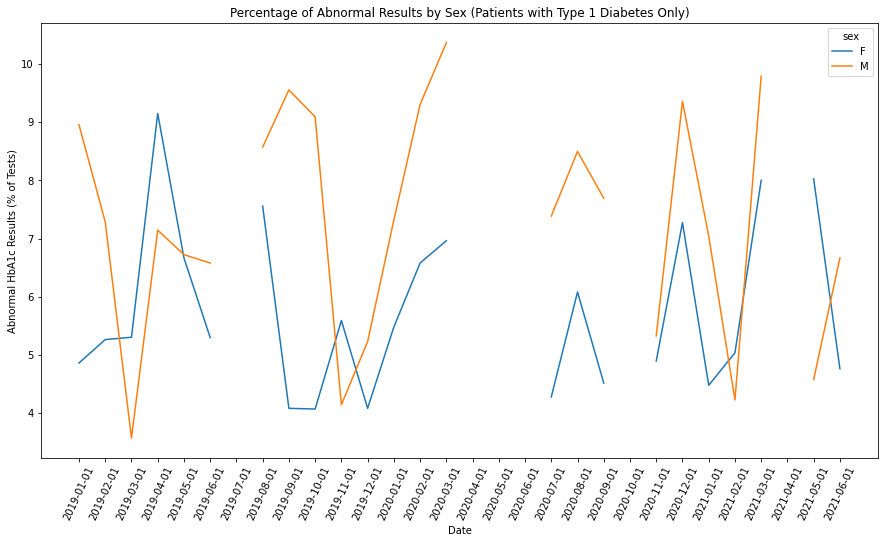

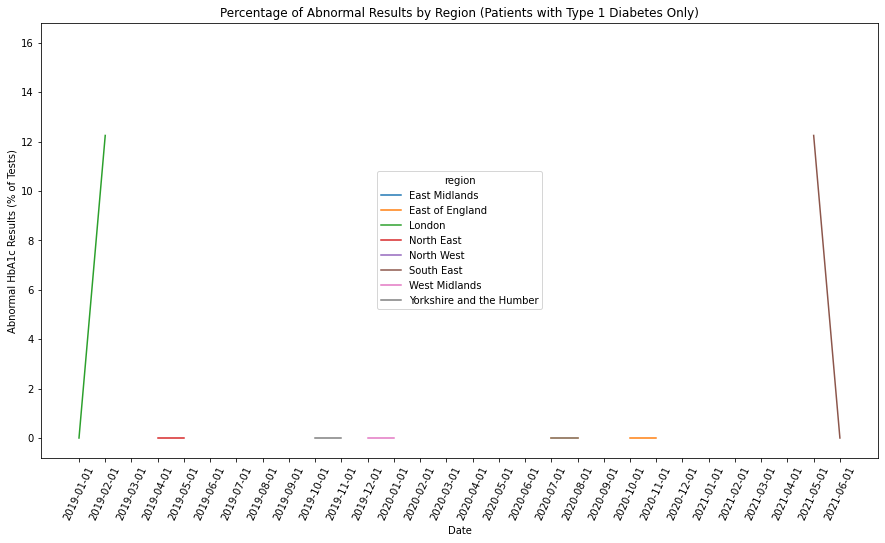

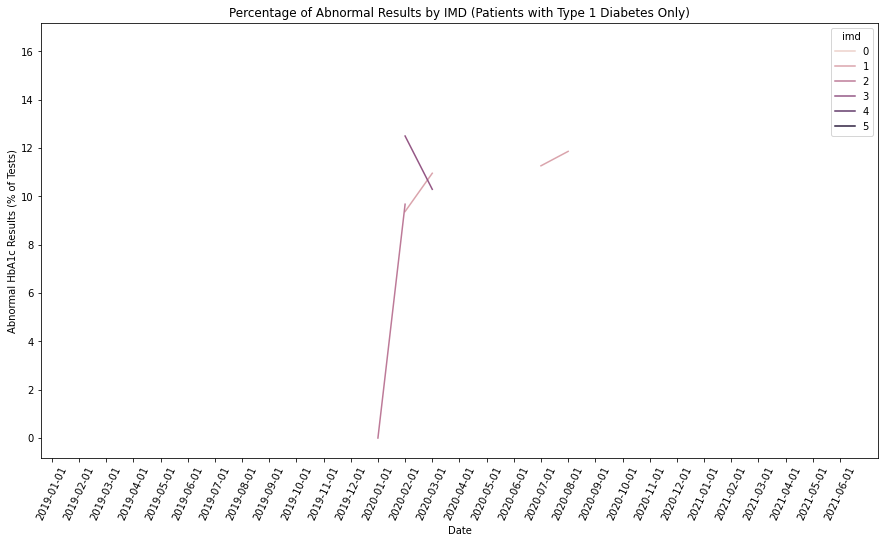

In [92]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 1 Diabetes Only)',
             'population', df_pop_t1)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 1 Diabetes Only)',
             'age_group', df_age_t1.loc[df_age_t1.age_group != 'missing'])

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 1 Diabetes Only)',
             'sex', df_sex_t1)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 1 Diabetes Only)',
             'region', df_region_t1)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 1 Diabetes Only)',
             'imd', df_imd_t1)

## Count of Abnormal Results (Patients with Type 2 Diabetes Only)

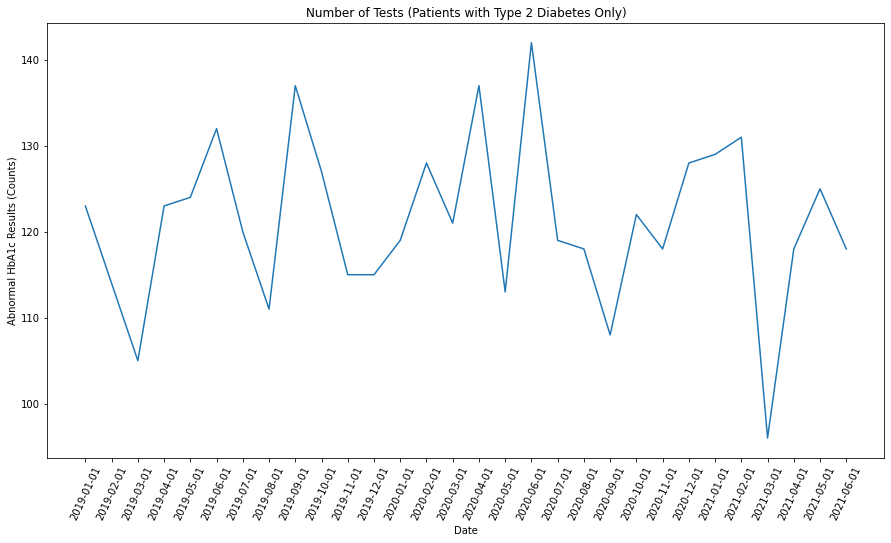

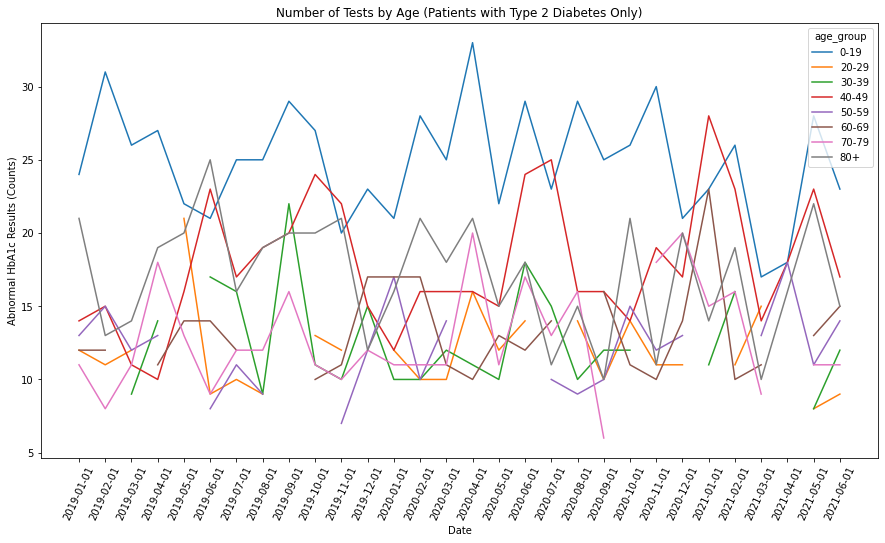

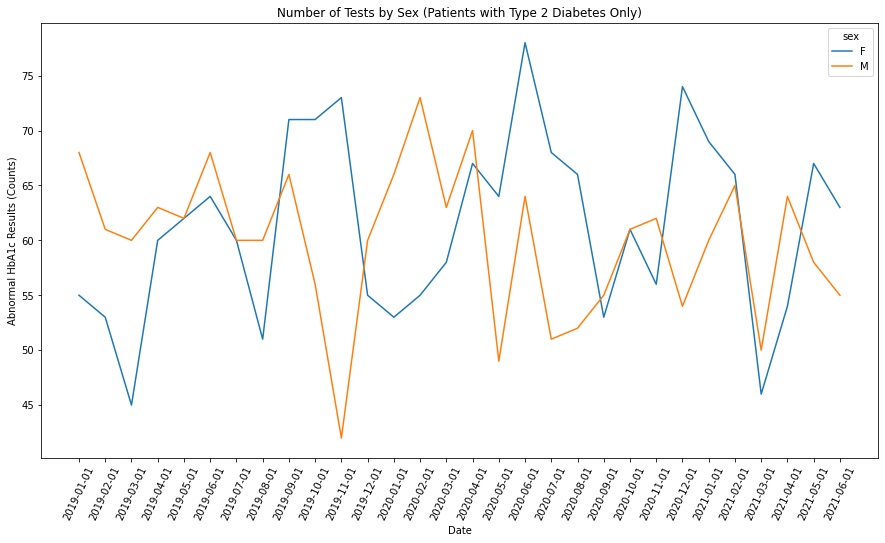

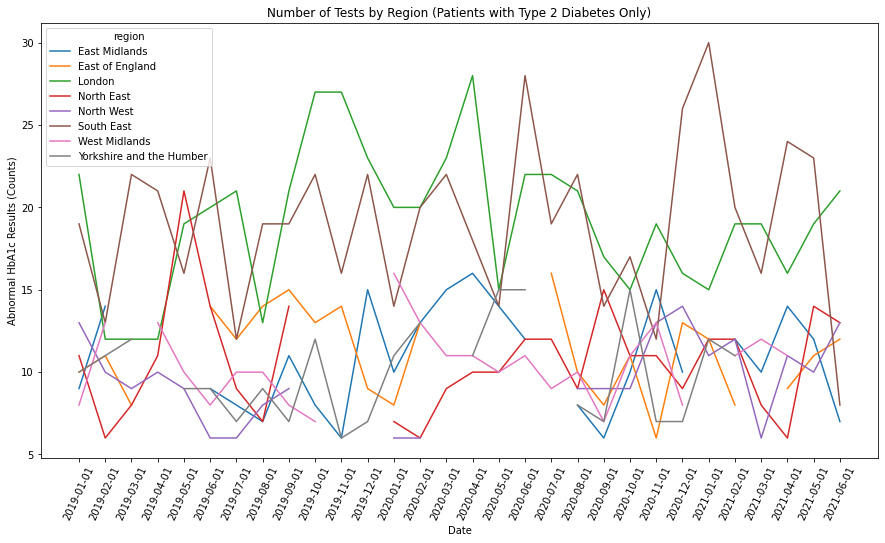

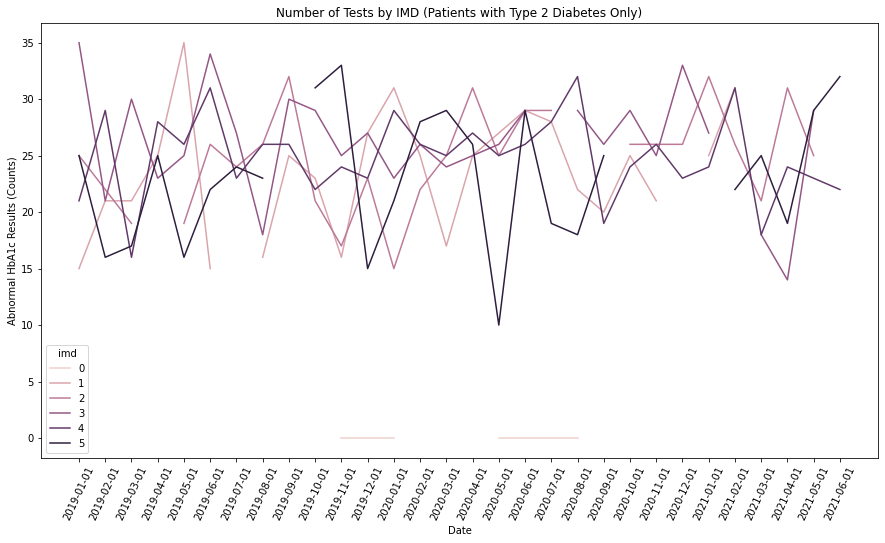

In [79]:
# Population
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)', 
             'Number of Tests (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2)

# Age
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[df_age_t2.age_group != 'missing'])

# Sex
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2)

# Region
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2)

# IMD
create_chart('hba1c_abnormal', 'Abnormal HbA1c Results (Counts)',
             'Number of Tests by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2)

## Percentage of Abnormal Results of Total Tests (Patients with Type 2 Diabetes Only)

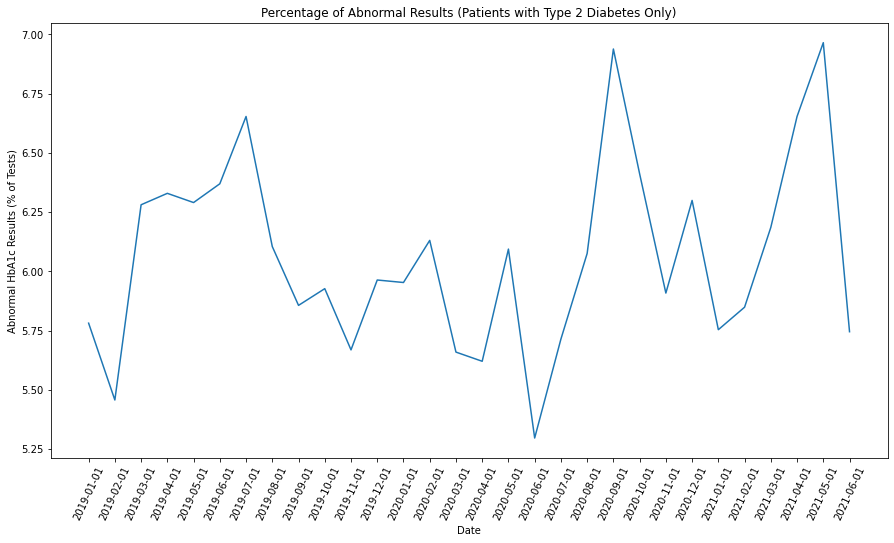

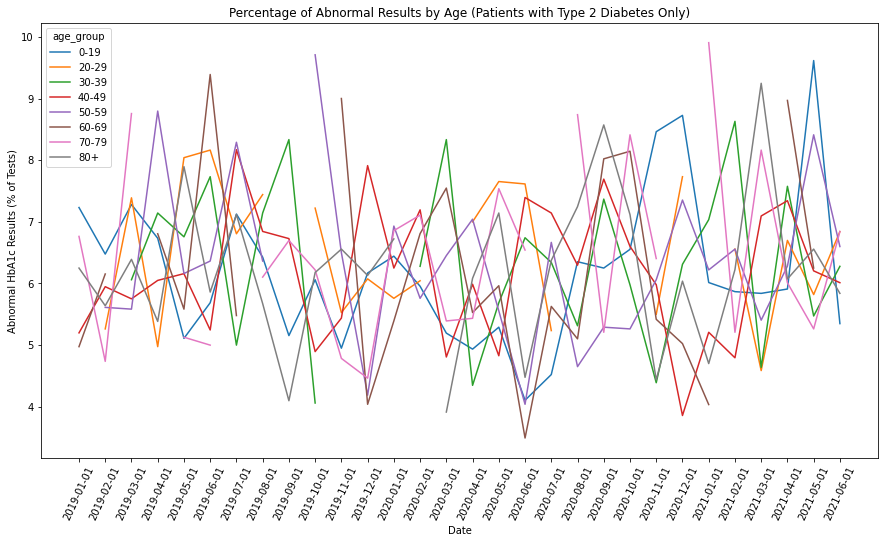

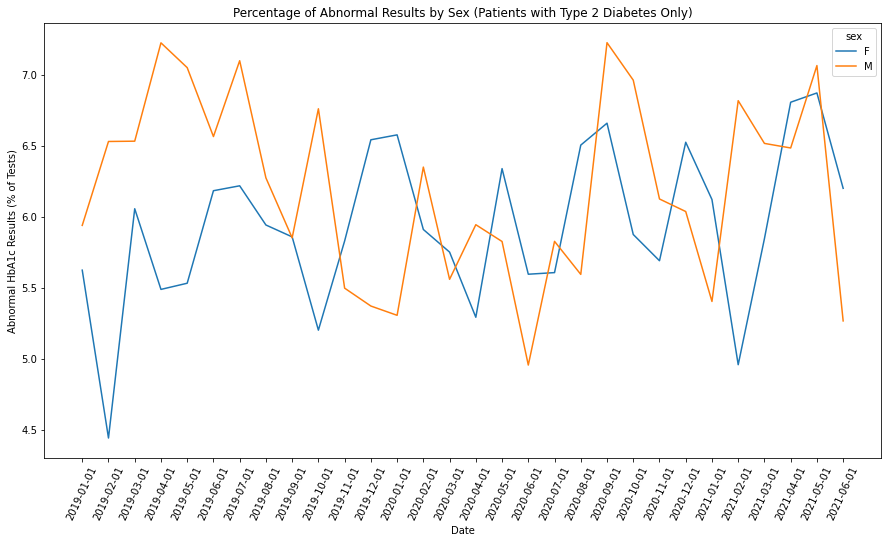

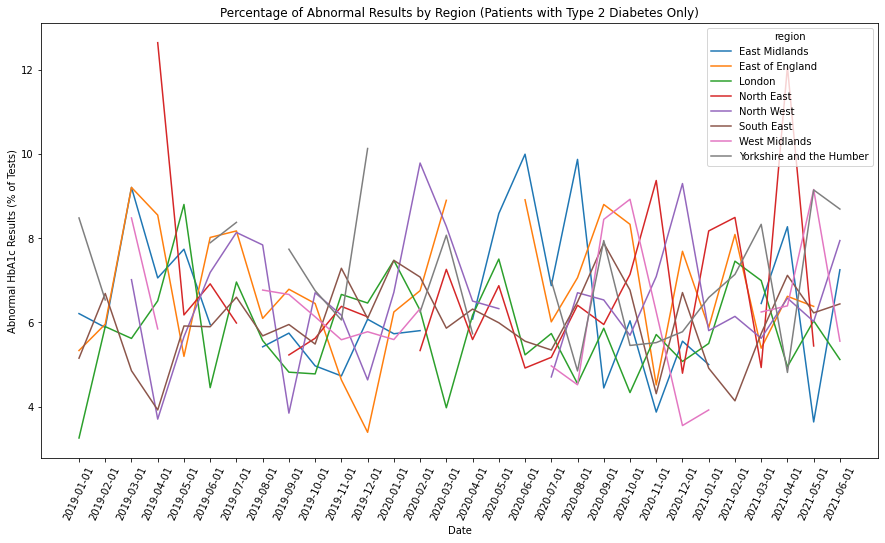

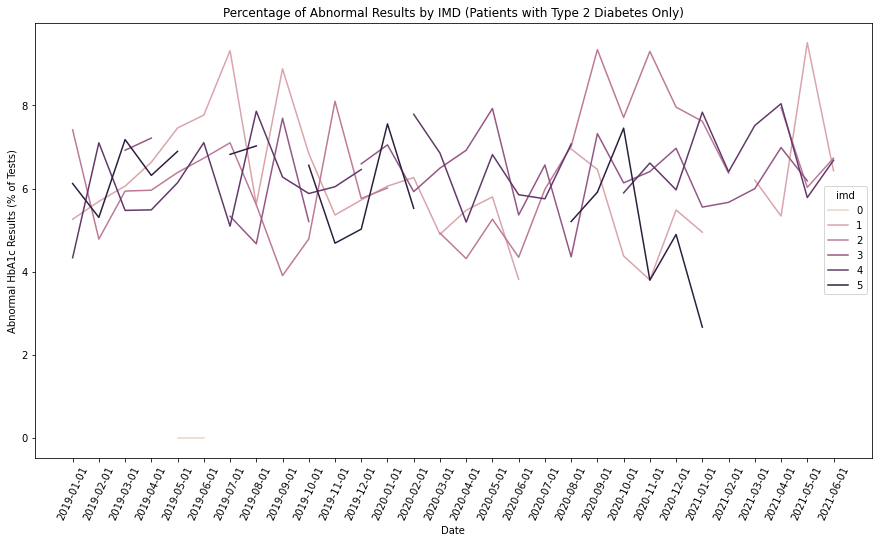

In [94]:
# Population
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)', 
             'Percentage of Abnormal Results (Patients with Type 2 Diabetes Only)',
             'population', df_pop_t2)

# Age
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Age (Patients with Type 2 Diabetes Only)',
             'age_group', df_age_t2.loc[df_age_t2.age_group != 'missing'])

# Sex
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Sex (Patients with Type 2 Diabetes Only)',
             'sex', df_sex_t2)

# Region
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by Region (Patients with Type 2 Diabetes Only)',
             'region', df_region_t2)

# IMD
create_chart('pct', 'Abnormal HbA1c Results (% of Tests)',
             'Percentage of Abnormal Results by IMD (Patients with Type 2 Diabetes Only)',
             'imd', df_imd_t2)